In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('house_prices.csv')
df_new = df[df.BldgType=='1Fam'].copy()
df_new = df_new.dropna()
df_new.head()

,Id,BldgType,LotArea,GrLivArea,YearBuilt,YrSold,SalePrice
0,1,1Fam,8450,1710.0,2003,2008,208500
2,3,1Fam,11250,1786.0,2001,2008,223500
3,4,1Fam,9550,1717.0,1915,2006,140000
4,5,1Fam,14260,2198.0,2000,2008,250000
5,6,1Fam,14115,1362.0,1993,2009,143000


In [2]:
train_raw = df_new[df_new.YrSold < 2010].reset_index(drop=True)
test_raw = df_new[df_new.YrSold >= 2010].reset_index(drop=True)
train = train_raw[['LotArea','GrLivArea','YearBuilt','YrSold','SalePrice']].copy()
test = test_raw[['LotArea','GrLivArea','YearBuilt','YrSold','SalePrice']].copy()

In [3]:
features = list(train.columns)
target = "SalePrice"
features.remove(target)

X = train_raw[features].copy()
y = train_raw[target].copy()

X_test = test[features].copy()
y_test = test[target].copy()

# Validation Data

In [4]:
from sklearn.model_selection import train_test_split

**Example:** Split training data in to new training data and validation data.

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                      y, 
                                                      test_size=0.2, 
                                                      random_state=2022)

In [6]:
X_train.head()

,LotArea,GrLivArea,YearBuilt,YrSold
268,9855,1689.0,1956,2009
16,14230,1600.0,2007,2009
141,12435,1792.0,2001,2008
854,16545,2450.0,1998,2009
245,14154,2172.0,2006,2007


**Example:** Find the best **alpha** for Lasso using **validation score**.

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import mean_squared_error

In [27]:
avalues=list(np.logspace(-3, 3, 13))
mse = []
for a in avalues:
    steps = [('poly', PolynomialFeatures(degree=3)),
             ('rescale', MinMaxScaler()),
             ('lr', Ridge(alpha=a, max_iter=100000))]
    model = Pipeline(steps)
    model = model.fit(X_train, y_train)
    mse.append(mean_squared_error(y_valid, model.predict(X_valid)))

In [28]:
import matplotlib.pylab as plt
%matplotlib inline

Text(0.5, 1.0, 'Loss vs. alpha using Ridge')

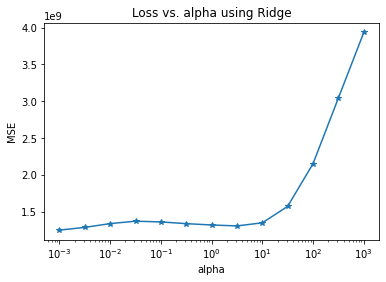

In [29]:
plt.plot(avalues, mse, marker='*')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Loss vs. alpha using Ridge')

<font color='red'>Question:</font> What are training, validation, and testing data for? Why did we use validation data to find the best **alpha**? Can we use test data to find the best **alpha**?

# K-fold Cross Validation

<font color='red'>Assignment:</font> Use **KFold** instead of **train_test_split** to find the best **alpha**. 

In [30]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=2022)
kf.get_n_splits(X)

5

In [34]:
avalues=list(np.logspace(-3, 3, 13))
mse_kfold = []

for train_index, valid_index in kf.split(X,y):
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    print('Train length', len(train_index), 'Train index:', train_index[0:5], 
          'Valid length', len(valid_index),'Valid index:',valid_index[0:5])
    mse = []
    for a in avalues:
        fill in your own code here

Train length 698 Train index: [0 1 2 3 4] Valid length 175 Valid index: [ 7 10 27 32 34]
Train length 698 Train index: [0 2 3 5 7] Valid length 175 Valid index: [ 1  4  6 13 15]
Train length 698 Train index: [0 1 3 4 5] Valid length 175 Valid index: [ 2  9 17 21 22]
Train length 699 Train index: [0 1 2 4 6] Valid length 174 Valid index: [ 3  5  8 20 30]
Train length 699 Train index: [1 2 3 4 5] Valid length 174 Valid index: [ 0 11 12 14 18]


<font color='red'>Question:</font> What is the difference between **KFold** and **train_test_split**? What is the advantages and disadvanteges of k-fold cross validation?

# 3. GridSearchCV

<font color='red'>Assignment:</font> By now, we have only tuned the value of **alpha**. Actually, **degree** in **PolynomialFeatures** is also a hyper parameter. Can we find the best values for both of them? You can try to use **GridSearchCV**, and also **make_scorer**.

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
avalues=list(np.logspace(-3, 3, 13))
tuned_parameters = [{'lr__alpha':avalues,'poly__degree':range(1,10)}]
my_mse = make_scorer(mean_squared_error, greater_is_better=False)


